In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras import Input
import keras.activations as act
from scikeras.wrappers import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error 

In [2]:
df = pd.read_csv('./melting-point/train_scaled.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,325,326,327,328,329,330,331,332,333,Tm
0,-0.754432,-0.420951,-0.277852,-0.178342,-0.178139,-0.138119,-0.116084,-0.087982,-0.073445,-0.027934,...,-0.019749,-0.042254,-0.027934,-0.019749,-0.062376,-0.084493,-0.034219,-0.027934,-0.032926,213.15
1,-0.754432,-0.420951,-0.277852,-0.178342,-0.178139,-0.138119,-0.116084,-0.087982,-0.073445,-0.027934,...,-0.019749,-0.042254,-0.027934,-0.019749,12.244915,-0.084493,-0.034219,-0.027934,-0.032926,407.15
2,0.721068,-0.141226,-0.277852,-0.178342,-0.178139,-0.138119,-0.116084,-0.087982,-0.073445,-0.027934,...,-0.019749,-0.042254,-0.027934,-0.019749,-0.062376,-0.084493,-0.034219,-0.027934,-0.032926,324.15
3,-0.016682,-0.420951,-0.277852,-0.178342,-0.178139,-0.138119,-0.116084,-0.087982,-0.073445,-0.027934,...,-0.019749,-0.042254,-0.027934,-0.019749,-0.062376,-0.084493,-0.034219,-0.027934,-0.032926,351.15
4,0.721068,0.418224,-0.277852,-0.178342,-0.178139,-0.138119,-0.116084,-0.087982,-0.073445,-0.027934,...,-0.019749,-0.042254,-0.027934,-0.019749,-0.062376,-0.084493,-0.034219,-0.027934,-0.032926,126.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,-0.754432,-0.141226,-0.277852,-0.178342,-0.178139,-0.138119,-0.116084,-0.087982,-0.073445,-0.027934,...,-0.019749,-0.042254,-0.027934,-0.019749,-0.062376,-0.084493,-0.034219,-0.027934,-0.032926,256.45
2561,-0.754432,-0.420951,-0.277852,-0.178342,-0.178139,-0.138119,-0.116084,-0.087982,-0.073445,-0.027934,...,-0.019749,-0.042254,-0.027934,-0.019749,-0.062376,-0.084493,-0.034219,-0.027934,-0.032926,231.15
2562,-0.754432,-0.420951,-0.277852,-0.178342,-0.178139,-0.138119,-0.116084,-0.087982,-0.073445,-0.027934,...,-0.019749,-0.042254,-0.027934,-0.019749,-0.062376,-0.084493,-0.034219,-0.027934,-0.032926,256.25
2563,-0.016682,-0.141226,-0.277852,-0.178342,-0.178139,-0.138119,-0.116084,-0.087982,-0.073445,-0.027934,...,-0.019749,-0.042254,-0.027934,-0.019749,-0.062376,-0.084493,-0.034219,-0.027934,-0.032926,333.15


In [3]:
melting_point={}
melting_point["data"] = df.drop(['Tm'], axis=1).values
melting_point["target"] = df["Tm"].values

In [4]:
rows = len(melting_point['data'][0])

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(melting_point["data"], melting_point["target"], test_size=0.1)

# Rede neural

In [6]:
def build_model(lr=0.001):
    model = Sequential()

    #337
    model.add(Input(shape=(rows,)))

    model.add(Dense(rows))
    model.add(Activation(act.sigmoid))

    model.add(Dense(rows//2))
    model.add(Activation(act.leaky_relu))

    model.add(Dense(1))
    
    model.compile(optimizer=Adam(learning_rate=lr), loss='mean_absolute_error', metrics=['r2_score'])
    return model

regressor = KerasRegressor(model=build_model, epochs=100, batch_size=32, verbose=1, lr=0.001)

In [7]:
regressor.fit(X_train, 
          Y_train, 
          epochs=100, 
          batch_size=64,
          validation_data=(X_test, Y_test)) 

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 239.3192 - r2_score: -11.3485 - val_loss: 180.7464 - val_r2_score: -6.5103
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 122.1927 - r2_score: -3.1103 - val_loss: 59.9279 - val_r2_score: -0.1834
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.9407 - r2_score: 0.1794 - val_loss: 45.3970 - val_r2_score: 0.2734
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.4319 - r2_score: 0.4593 - val_loss: 41.0458 - val_r2_score: 0.4194
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35.7344 - r2_score: 0.5629 - val_loss: 38.3072 - val_r2_score: 0.5095
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32.5779 - r2_score: 0.6241 - val_loss: 35.8307 - val_r2_score: 0.5706
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.6630 - r2_score: 0.6576 - val_loss: 34.0831 - val_r2_score: 0.6055
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.1863 - r2_score: 0.6820 - v

,model,<function bui...0023E51C4BCE0>
,build_fn,None
,warm_start,False
,random_state,None
,optimizer,'rmsprop'
,loss,None
,metrics,None
,batch_size,32
,validation_batch_size,None
,verbose,1
,callbacks,None


In [8]:
pred = regressor.predict(X_test)

print("R2 score:", regressor.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R2 score: 0.7041617610968152
Mean Absolute error: 28.060492926571616


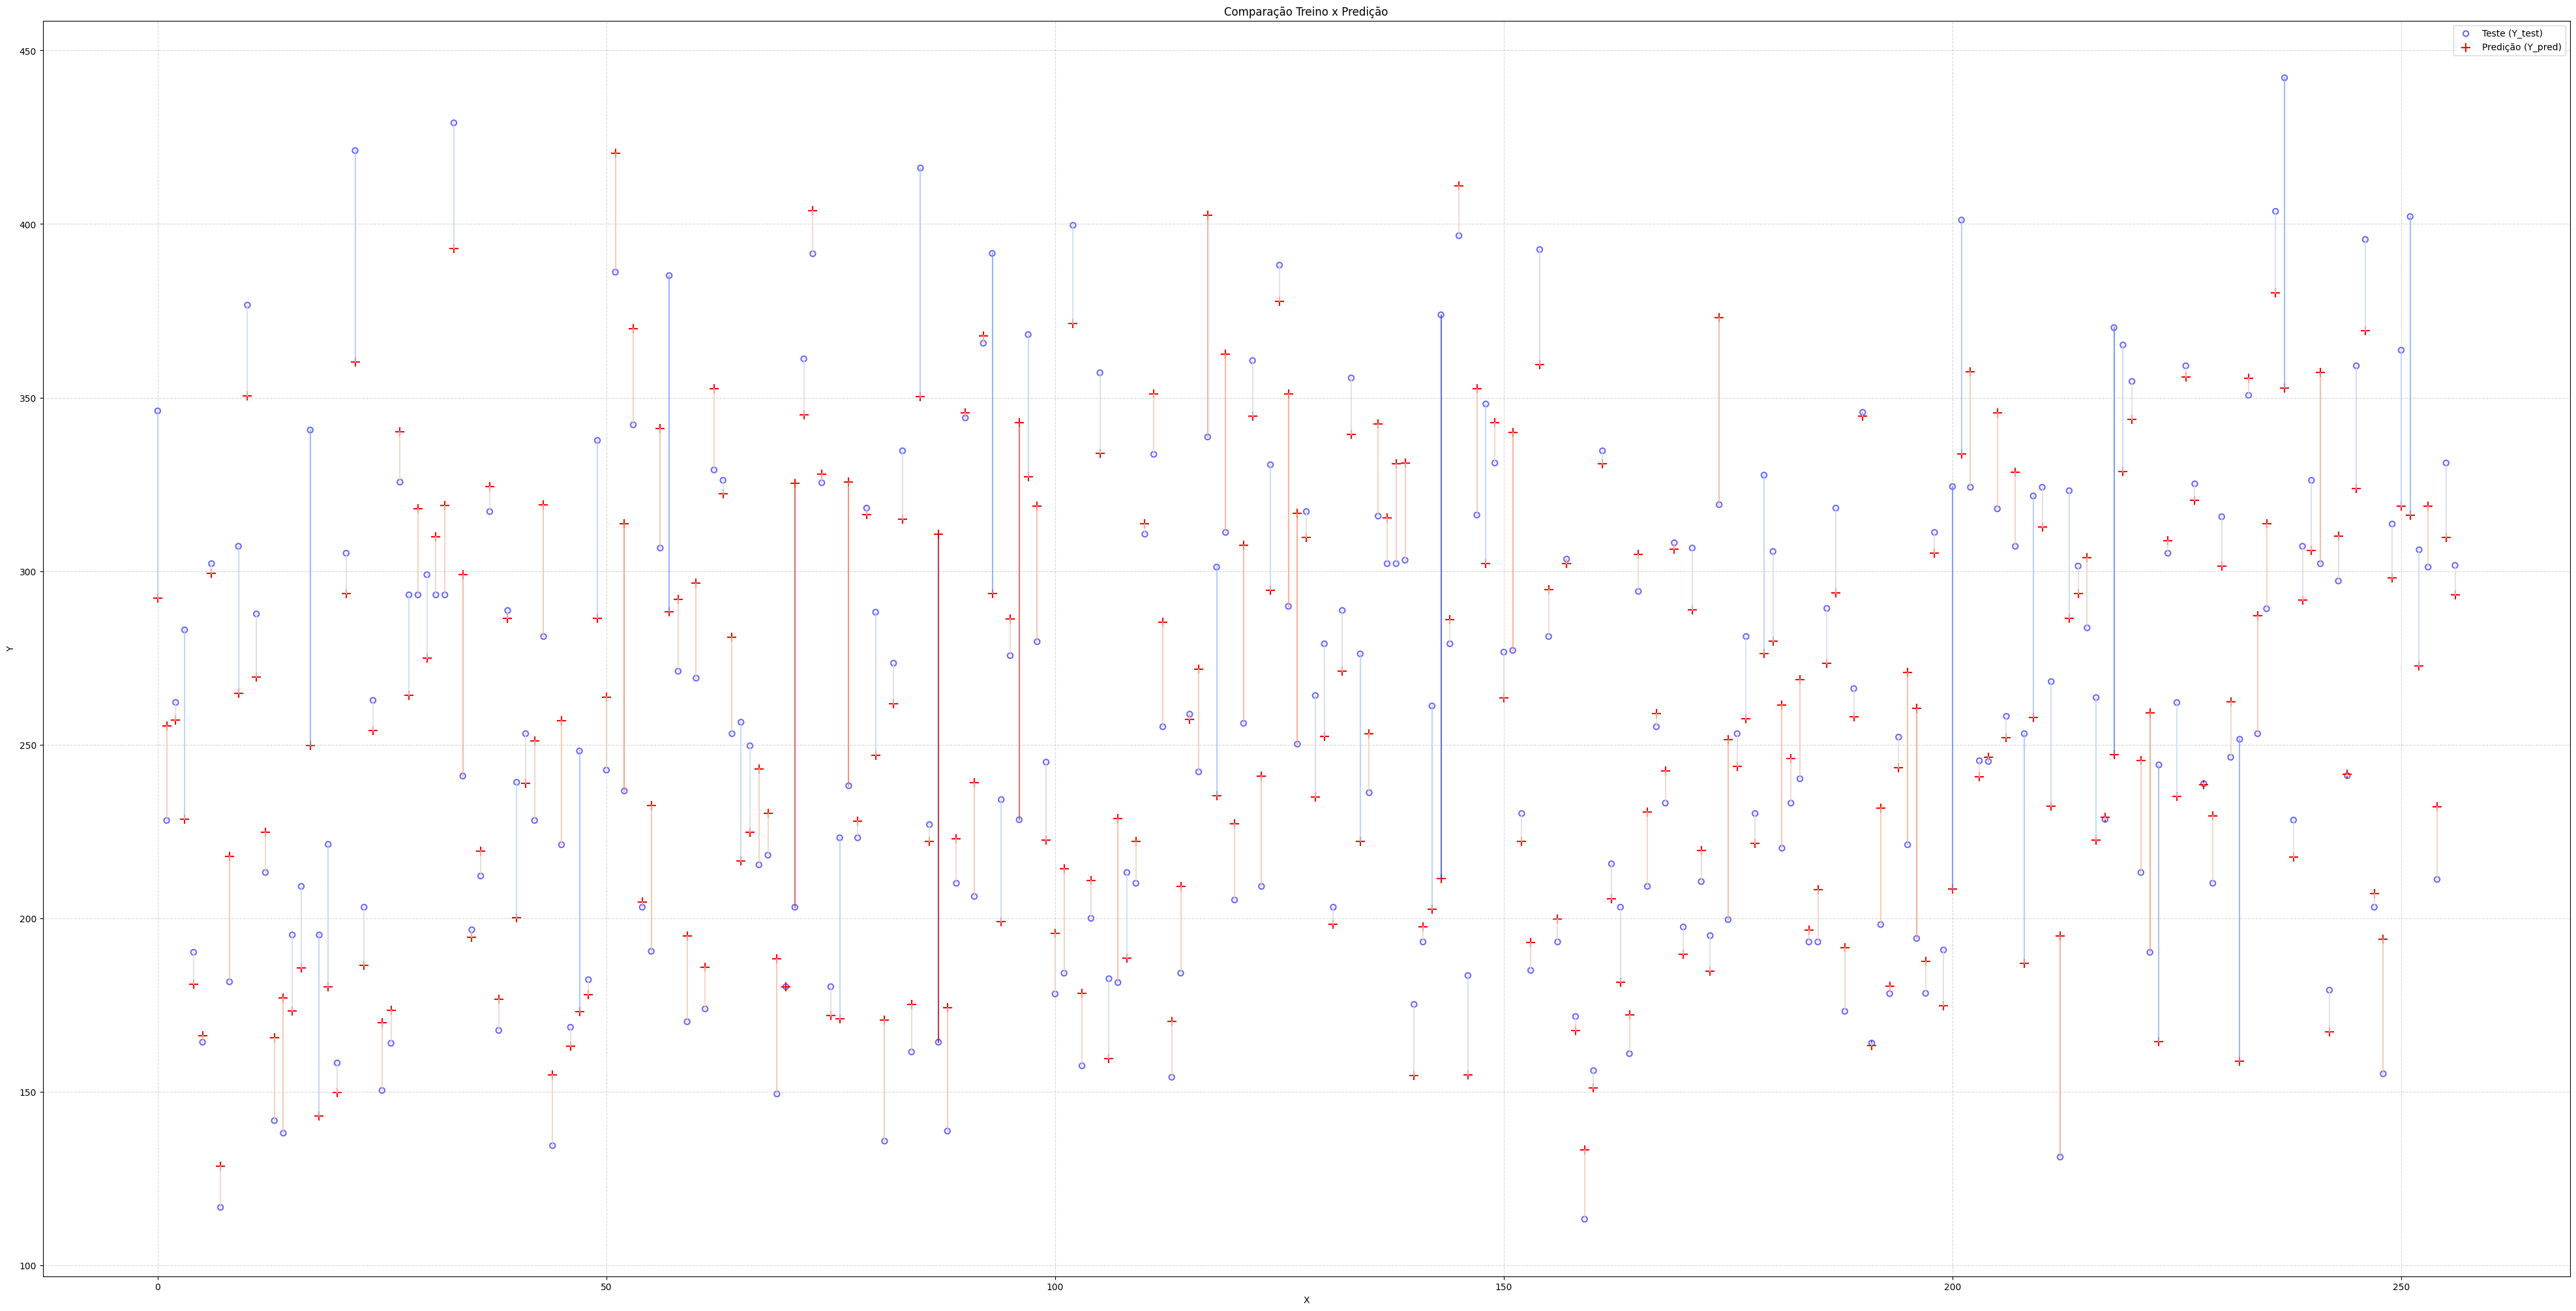

In [9]:
plt.figure(figsize=(50, 25))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

diff = pred - Y_test

norm = Normalize(vmin=np.min(diff), vmax=np.max(diff))
cmap = plt.cm.coolwarm  # azul pra negativo, vermelho pra positivo

for x, y_real, y_est, d in zip(x_range, Y_test, pred, diff):
    cor = cmap(norm(d))
    plt.plot([x, x], [y_real, y_est], color=cor, linewidth=1.5, alpha=0.8)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
print("Mean Absolute Error:")
nn_scores = cross_val_score(regressor, melting_point["data"], melting_point["target"], cv=10, n_jobs=-1, scoring='neg_mean_absolute_error')
print(nn_scores)
print(nn_scores.mean())
print(nn_scores.std())

print("R2:")
nn_r2_scores = cross_val_score(regressor, melting_point["data"], melting_point["target"], cv=10, n_jobs=-1, scoring='r2')
print(nn_r2_scores)
print(nn_r2_scores.mean())
print(nn_r2_scores.std())

print("Explained Variance:")
nn_ev_scores = cross_val_score(regressor, melting_point["data"], melting_point["target"], cv=10, n_jobs=-1, scoring='explained_variance')
print(nn_ev_scores)
print(nn_ev_scores.mean())
print(nn_ev_scores.std())

Mean Absolute Error:
